Please upload your CSV file


Saving train_dataset.csv to train_dataset.csv
Labeled dataset is ready for download:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

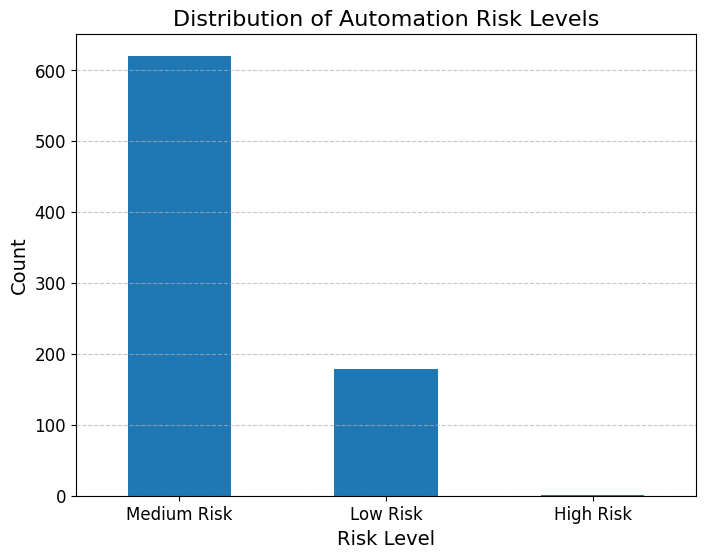

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Function to label automation risk
def label_risk_extended(row):
    if (row['complexity'] == 'Low' and row['creativity'] == 'Low' and
        row['human_interaction'] == 'Low' and row['time_taken'] in ['<1 hour'] and
        row['frequency'] in ['Daily'] and row['skill_level'] == 'Beginner'):
        return 'High Risk'
    elif (row['complexity'] == 'Medium' or row['task_type'] == 'Technical' or
          row['frequency'] in ['Weekly'] or row['skill_level'] == 'Intermediate'):
        return 'Medium Risk'
    else:
        return 'Low Risk'

# Upload dataset
print("Please upload your CSV file")
uploaded = files.upload()

# Load the dataset
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Apply the labeling function
data['Automation_Risk'] = data.apply(label_risk_extended, axis=1)

# Save the labeled dataset
output_file = "labeled_dataset.csv"
data.to_csv(output_file, index=False)

# Download the labeled dataset
print("Labeled dataset is ready for download:")
files.download(output_file)

# Create a graphical representation of risk levels
risk_counts = data['Automation_Risk'].value_counts()

# Plot the distribution of risk levels
plt.figure(figsize=(8, 6))
risk_counts.plot(kind='bar')
plt.title('Distribution of Automation Risk Levels', fontsize=16)
plt.xlabel('Risk Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
